In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
cd "/content/gdrive/My Drive/"

/content/gdrive/My Drive


In [ ]:
# !unzip -q 'train_HNzkrPW (1).zip' -d face_detection/

In [ ]:
cd face_detection

/content/gdrive/My Drive/face_detection


In [ ]:
my_path = '/content/gdrive/My Drive/face_detection/'

In [ ]:
from google.colab import files
files.upload()

Saving haarcascade_frontalface_default.xml to haarcascade_frontalface_default.xml


{'haarcascade_frontalface_default.xml': b'<?xml version="1.0"?>\n<!--\n    Stump-based 24x24 discrete(?) adaboost frontal face detector.\n    Created by Rainer Lienhart.\n\n////////////////////////////////////////////////////////////////////////////////////////\n\n  IMPORTANT: READ BEFORE DOWNLOADING, COPYING, INSTALLING OR USING.\n\n  By downloading, copying, installing or using the software you agree to this license.\n  If you do not agree to this license, do not download, install,\n  copy or use the software.\n\n\n                        Intel License Agreement\n                For Open Source Computer Vision Library\n\n Copyright (C) 2000, Intel Corporation, all rights reserved.\n Third party copyrights are property of their respective owners.\n\n Redistribution and use in source and binary forms, with or without modification,\n are permitted provided that the following conditions are met:\n\n   * Redistribution\'s of source code must retain the above copyright notice,\n     this l

In [ ]:
ls

bbox_train.csv  image_data/  train.csv


In [ ]:
images_dir = 'image_data/'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train_df_original = pd.read_csv('train.csv')
bbox_train_original = pd.read_csv('bbox_train.csv')
train_df = train_df_original.copy()
bbox_train = bbox_train_original.copy()

In [ ]:
train_df

,Name,HeadCount
0,10001.jpg,4
1,10002.jpg,4
2,10003.jpg,2
3,10004.jpg,3
4,10006.jpg,4
...,...,...
5728,18201.jpg,2
5729,18203.jpg,3
5730,18204.jpg,5
5731,18205.jpg,8


In [ ]:
bbox_train

,Name,width,height,xmin,ymin,xmax,ymax
0,10001.jpg,612,408,192,199,230,235
1,10001.jpg,612,408,247,168,291,211
2,10001.jpg,612,408,321,176,366,222
3,10001.jpg,612,408,355,183,387,214
4,10002.jpg,612,408,339,165,378,202
...,...,...,...,...,...,...,...
24528,18205.jpg,612,425,9,52,52,116
24529,18207.jpg,475,612,160,149,241,226
24530,18207.jpg,475,612,226,47,277,104
24531,18207.jpg,475,612,113,41,179,106


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5733 entries, 0 to 5732
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       5733 non-null   object
 1   HeadCount  5733 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.7+ KB


In [ ]:
def draw_mask(boxes, w, h):
    masks = np.zeros([h, w], dtype='uint8')
    for i in range(len(boxes)):
      box = boxes[i]
      row_s, row_e = box[1], box[3]
      col_s, col_e = box[0], box[2]
      masks[row_s:row_e, col_s:col_e] = 1
      # print(i)
    plt.imshow(masks, cmap='gray', alpha=0.4)
    # return masks

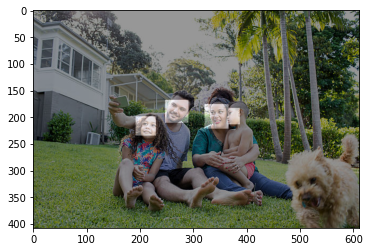

In [ ]:
n_boxes = train_df['HeadCount'][0]
boxes = []
for i in range(n_boxes):
  w = bbox_train['width'][i]
  h = bbox_train['height'][i]
  xmin = bbox_train['xmin'][i]
  ymin = bbox_train['ymin'][i]
  xmax = bbox_train['xmax'][i]
  ymax = bbox_train['ymax'][i]

  box = [xmin, ymin, xmax, ymax]
  boxes.append(box)

img = images_dir+'10001.jpg'
img = plt.imread(img)
plt.imshow(img)
draw_mask(boxes=boxes, w=w, h=h)

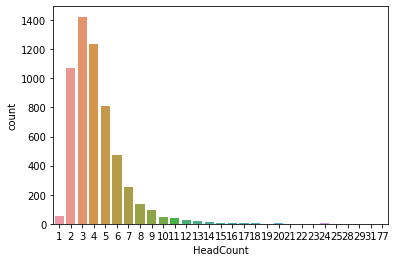

In [ ]:
sns.countplot(train_df['HeadCount'])

In [ ]:
ls

bbox_train.csv  haarcascade_frontalface_default.xml  image_data/  train.csv


In [ ]:
my_path

'/content/gdrive/My Drive/face_detection/'

In [ ]:
face_cascade = cv2.CascadeClassifier(my_path+ 'haarcascade_frontalface_default.xml')

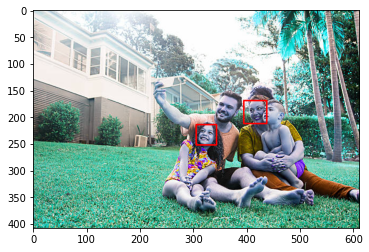

In [ ]:
img = images_dir+'10002.jpg'
img = cv2.imread(img, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    # eyes = eye_cascade.detectMultiScale(roi_gray)
    # for (ex,ey,ew,eh) in eyes:
    #     cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
face_cascade.detectMultiScale(img)

array([[198, 200,  38,  38]], dtype=int32)

In [ ]:
# # Importing the Keras libraries and packages
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
# def createModel():
#     model = Sequential()
#     # The first two layers with 32 filters of window size 3x3
#     model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
#     model.add(Conv2D(32, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))

#     model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#     model.add(Conv2D(64, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))

#     model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#     model.add(Conv2D(64, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))

#     model.add(Flatten())
#     model.add(Dense(512, activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(4, activation='relu'))
    
#     return model

In [ ]:
# input_shape = (224, 224, 3)
# model = createModel()
# model.compile(optimizer='adam', loss = 'mean_squared_error', metrics = ['mse'])